In [9]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import *
from sklearn import cross_validation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [55]:
help(MLPClassifier)

Help on class MLPClassifier in module sklearn.neural_network.multilayer_perceptron:

class MLPClassifier(BaseMultilayerPerceptron, sklearn.base.ClassifierMixin)
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity', 'logistic', 'tanh', 'relu'}, default 'relu'
 |      Activation function for the hidden layer.
 |  
 |      - 'identity', no-op activation, useful to implement linear bottleneck,
 |        returns f(x) = x
 |  
 |      - 'logistic', the logistic sigmoid function,
 |        returns f(x) = 1 / (1 + exp(-x)).
 |  
 |      - 'tanh', the hyperbolic tan function,
 |        returns f(x) = tanh(x).
 |  
 |      - 'relu', the rectified linear u

In [25]:
data = read_csv("/Users/mrigank/Desktop/python_projects/ML_project/letter-recognition.data.csv", sep=',', header=None)
data
data = np.array(data, dtype=object)
# seperate out X and y
X = data[:,1:]
y = data[:,0:1]
print("size of X is:", X.shape, "size of y is:", y.shape)

size of X is: (20000, 16) size of y is: (20000, 1)


In [199]:
data

array([['T', 2, 8, ..., 8, 0, 8],
       ['I', 5, 12, ..., 8, 4, 10],
       ['D', 4, 11, ..., 7, 3, 9],
       ..., 
       ['T', 6, 9, ..., 12, 2, 4],
       ['S', 2, 3, ..., 9, 5, 8],
       ['A', 4, 9, ..., 7, 2, 8]], dtype=object)

In [26]:
## y labels are formatted into a array of 26 binary numbers, for 26 different classes
y_new = np.zeros(shape = (y.shape))
u = np.unique(y)

for i in range(len(y)):
    for j in range(len(u)):
        if (y[i] == u[j]):
            y_new[i]=j
            break

y_new.shape

(20000, 1)

In [27]:
# 25% of the data is kept apart for cross-validation and testing
## sklearn function is used to do so
X_train, X_t_cv, y_train, y_t_cv = cross_validation.train_test_split(X, y_new, test_size=0.25)
# data seperated for test & cross-validation
X_cv, X_test, y_cv, y_test = cross_validation.train_test_split(X_t_cv, y_t_cv, test_size=0.5)
X_train.shape, y_train.shape
# train: 15000 : cv: 2500 : test: 2500 observations

((15000, 16), (15000, 1))

In [28]:
X_train.shape, X_cv.shape, X_test.shape

((15000, 16), (2500, 16), (2500, 16))

In [75]:
y_train.shape, y_cv.shape, y_test.shape

((15000, 1), (2500, 1), (2500, 1))

In [191]:
J_relu = list()
for i in range(10, 500, 50):
    clf = MLPClassifier(activation='relu', solver="sgd",alpha=1e-5,
                        hidden_layer_sizes=(32,), random_state=1,
                        max_iter=i)
    clf.fit(X_train, y_train.ravel())
    J_relu.append(clf.loss_)

/anaconda/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [192]:
J_tanh = list()
for i in range(10, 500, 50):
    clf = MLPClassifier(activation='tanh', solver="sgd", alpha=1e-5,
                        hidden_layer_sizes=(32,), random_state=1,
                        max_iter=i)
    clf.fit(X_train, y_train.ravel())
    J_tanh.append(clf.loss_)

/anaconda/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [193]:
J_sig = list()
for i in range(10, 500, 50):
    clf = MLPClassifier(activation='logistic',solver="sgd",
                        alpha=1e-5, hidden_layer_sizes=(32,),
                        random_state=1, max_iter=i)
    clf.fit(X_train, y_train.ravel())
    J_sig.append(clf.loss_)

/anaconda/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


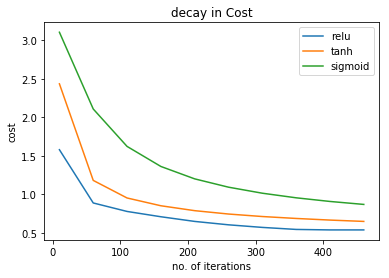

In [195]:
# Plot showing the cost decay, comparison among different activations 

iter = np.array(range(10, 500, 50))
plt.plot(iter, J_relu)
plt.plot(iter, J_tanh)
plt.plot(iter, J_sig)
plt.xlabel("no. of iterations")
plt.ylabel("cost")
plt.title("decay in Cost")
plt.legend(['relu','tanh','sigmoid'], loc='upper right')
plt.show()

In [164]:
# Training a classifier with 32 hidden neurons

clf32 = MLPClassifier(solver="sgd",alpha=1e-5, hidden_layer_sizes=(32,),random_state=1, max_iter=400)
clf32.fit(X_train, y_train.ravel())

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(32,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=400, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [172]:
# Training a classifier with 50 hidden neurons

clf50 = MLPClassifier(solver="sgd",alpha=1e-5, hidden_layer_sizes=(50,),random_state=1, max_iter=500)
clf50.fit(X_train, y_train.ravel())

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [176]:
# Training a classifier with 73 hidden neurons

clf73 = MLPClassifier(solver="sgd",alpha=1e-5, hidden_layer_sizes=(73,),random_state=1, max_iter=550)
clf73.fit(X_train, y_train.ravel())

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(73,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=550, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [174]:
# Training a classifier with 100 hidden neurons

clf100 = MLPClassifier(solver="sgd",alpha=1e-5, hidden_layer_sizes=(100,),random_state=1, max_iter=500)
clf100.fit(X_train, y_train.ravel())

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [179]:
# Training a classifier with 200 hidden neurons

clf200 = MLPClassifier(solver="sgd",alpha=1e-5, hidden_layer_sizes=(200,),random_state=1, max_iter=500)
clf200.fit(X_train, y_train.ravel())

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [184]:
clf10 = MLPClassifier(solver="sgd",alpha=1e-5, hidden_layer_sizes=(10,),random_state=1, max_iter=300)
clf10.fit(X_train, y_train.ravel())

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [208]:
acc = list()
for i in range(10, 200, 20):
    clf = MLPClassifier(solver="sgd",alpha=1e-5, hidden_layer_sizes=(i,),random_state=1, max_iter=500)
    clf.fit(X_train, y_train.ravel())
    err = clf.predict(X_cv) - y_cv.ravel()
    acc.append((2500-np.count_nonzero(err))/25)

/anaconda/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [209]:
acc_train = list()
for i in range(10, 200, 20):
    clf = MLPClassifier(solver="sgd",alpha=1e-5, hidden_layer_sizes=(i,),random_state=1, max_iter=500)
    clf.fit(X_train, y_train.ravel())
    err = clf.predict(X_train) - y_train.ravel()
    acc_train.append((15000-np.count_nonzero(err))/150)

/anaconda/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


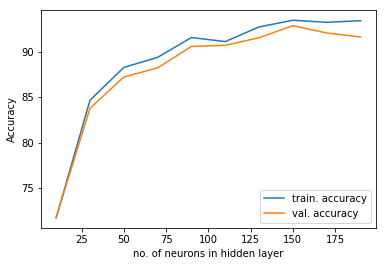

In [212]:
num_neurons = range(10, 200, 20)
plt.plot(num_neurons, acc_train)
plt.plot(num_neurons, acc)
plt.xlabel("no. of neurons in hidden layer")
plt.ylabel("Accuracy")
plt.legend(['train. accuracy','val. accuracy'], loc='lower right')
plt.show()

In [207]:
acc

[71.76, 71.76, 71.76, 71.76, 71.76, 71.76, 71.76, 71.76, 71.76, 71.76]

In [185]:
err10 = clf10.predict(X_cv) - y_cv.ravel()
err32 = clf32.predict(X_cv) - y_cv.ravel()
err50 = clf50.predict(X_cv) - y_cv.ravel()
err73 = clf73.predict(X_cv) - y_cv.ravel()
err100 = clf100.predict(X_cv) - y_cv.ravel()
err200 = clf200.predict(X_cv) - y_cv.ravel()

In [200]:
print("correct prediction % with 10 neurons :", (2500-np.count_nonzero(err10))/25)
print("correct prediction % with 32 neurons :", (2500-np.count_nonzero(err32))/25)
print("correct prediction % with 50 neurons :", (2500-np.count_nonzero(err50))/25)
print("correct prediction % with 73 neurons :", (2500-np.count_nonzero(err73))/25)
print("correct prediction % with 100 neurons :", (2500-np.count_nonzero(err100))/25)
print("correct prediction % with 200 neurons :", (2500-np.count_nonzero(err200))/25)

correct prediction % with 10 neurons : 71.76
correct prediction % with 32 neurons : 84.08
correct prediction % with 50 neurons : 87.2
correct prediction % with 73 neurons : 89.8
correct prediction % with 100 neurons : 91.04
correct prediction % with 200 neurons : 92.04


In [ ]:
###########################################################

In [132]:
clf1 = MLPClassifier(solver="lbfgs",
                     alpha=1e-5, hidden_layer_sizes=(100,),
                     random_state=1, max_iter=200)

In [133]:
clf1.fit(X_train, y_train.ravel())

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [152]:
pred = clf1.predict(X_test)
pred.shape

(2500,)

In [202]:
clf1.get_params()

{'activation': 'relu',
 'alpha': 1e-05,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [158]:
y_pred = np.column_stack((y_test.ravel(), pred))
y_pred.shape


(2500, 2)

In [160]:
np.savetxt('y_pred.txt', y_pred, delimiter=',')